# Clustering

Topic modeling is "soft" clustering; let's change that to explicit clusters by taking each work's most important topic.

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import pickle

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Load our model.

In [26]:
model_info = pickle.load(open("../models/avatar_model.pickle", "rb" ))

model = model_info["model"]
dictionary = model_info["dict"]
corpus = model_info["corpus"]

Let's take a closer look at our topics.

In [37]:
for i in range(model.num_topics):
    print(model.show_topic(i, topn=20), "\n")

[('yue', 0.009995302), ('fish', 0.0033362852), ('chief', 0.0031552024), ('ocean', 0.0031141932), ('snow', 0.0029772522), ('sand', 0.0029670584), ('tent', 0.002942843), ('waterbender', 0.0027138009), ('bender', 0.002672898), ('glow', 0.0024474605), ('beach', 0.0023836163), ('sea', 0.0023337086), ('village', 0.0022296438), ('fur', 0.002123047), ('river', 0.002066429), ('northern', 0.002035358), ('boat', 0.0019597064), ('human', 0.0019594538), ('metal', 0.0019322705), ('path', 0.0019311558)] 

[('wound', 0.0028220515), ('cough', 0.0026569832), ('thumb', 0.0026519957), ('flower', 0.0025177717), ('lung', 0.0024289712), ('bandage', 0.0024243663), ('scratch', 0.0024155288), ('sweat', 0.0023694513), ('bowl', 0.0023646413), ('mask', 0.0023434875), ('breathing', 0.00231163), ('pink', 0.0022579492), ('blade', 0.00219806), ('rib', 0.002145332), ('tighten', 0.0021418969), ('injury', 0.0021395227), ('pillow', 0.0021296847), ('bone', 0.0020614164), ('heartbeat', 0.0020598187), ('hip', 0.0020574732)] 

Based on these words and a perusal of the fanfictions that fall in each cateogory, we come up with the following subjective topic labels and descriptions:

1. Sokka/Water Tribe ("yue," "fish," "ocean," "river")

Zuko lives with the water tribe and befriends/romances Sokka. 

2. War & Injury ("wound," "cough," "lung," "bandage")

Zuko fights in the war as a soldier and deals with the trauma of battle.

3. Freedom Fighters & Allies ("jet", "duke", "teo", "haru")

Zuko fights with and against Jet, the Freedom Fighters, and a few other miscellaneous allies.

4. Modern AU ("car", "drive", "phone", "school", "kitchen", "coffee")

A catch-all modern AU section. Some of these are in a Coffee Shop AU.

5. "I must capture the Avatar!" ("zhao", "capture", "honor", "banish", "nephew", "throne")

Zuko must capture the Avatar to restore his honor.

6. Miscellaneous

There's not much cohesion to these words; it seems like a miscellaneous section.

7. Hakoda ("hakoda", "chief", "bato", "ursa", village")

Hakoda acts as a substitute father figure for Zuko.

8. Ambassador Sokka ("izumi", "marry", "princess", "garden", "ambassaddor", "advisor", "husband", "council")

In a postwar Fire Nation, Fire Lord Zuko and Sokka, now an ambassador stationed in the fire nation, find romance.

9. Modern School AU ("date", "school", "class", "apartment", "boyfriend", "couch")

Zuko is a modern high schooler/college student. More specific than the previous Modern AU topic, though there is some overlap.

10. Earth Kingdom/Ba Sing Se ("lee", "dai li", "earthbender", "agent")

Zuko, possibly living under the name "Lee," lives in Ba Sing Se or the Earth Kingdom at large.

11. Early Fire Court Drama ("lu ten", "ursa", "azulon", "grandfather", "nephew", roku")

Explores the politics of the fire court before Zuko's banishment, and possibly before Ozai ascended to the throne. Often involves Iroh's deceased son Lu Ten and the former's claim to the throne.

Now let's cluster and make a t-SNE Plot.

Our utility function ```corpus_to_topic_matrix``` transforms the sparse corpus into dense format to be passed to ```sklearn.manifold.TSNE```. (The latter does support sparse input but we use a dense matrix for simplicity's sake.)

In [27]:
def bow_to_topic_arr(bow, model):
    arr = [0.0 for i in range(model.num_topics)]
    top_tuples = model[bow]
    for topic, weight in top_tuples:
        arr[topic] = weight
    return arr

def corpus_to_topic_matrix(corpus, model):
    return [bow_to_topic_arr(bow, model) for bow in corpus]

In [28]:
X = corpus_to_topic_matrix(corpus, model)

Let's construct a t-SNE plot to visualize the grouping of the clusters. (Note that t-SNE is merely an eyeball test of sorts and does not accurately represent distances.)

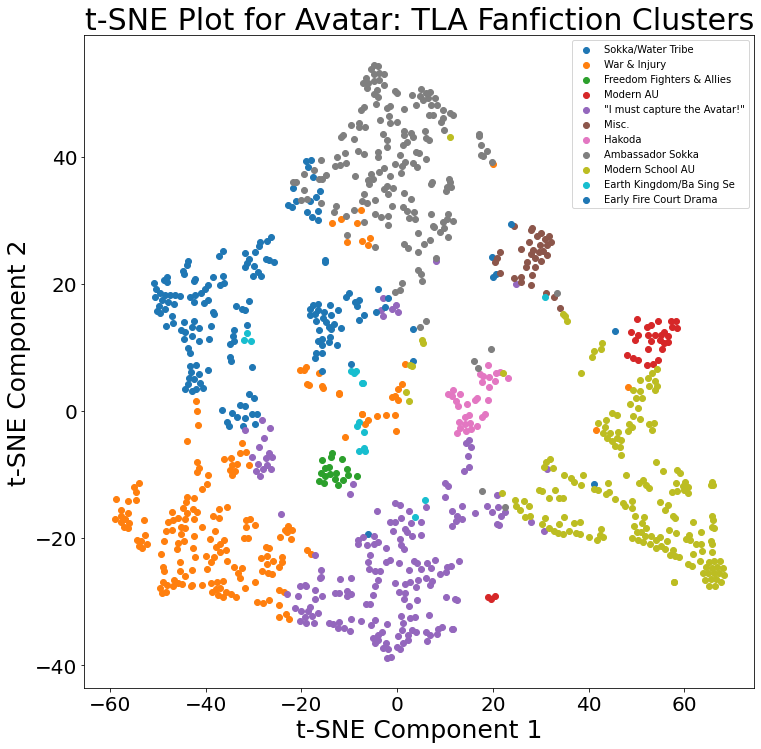

In [42]:
tsne = TSNE(n_components = 2, perplexity = 25, n_iter=5000, random_state=0, init='pca', angle=0.3)

X_tsne = tsne.fit_transform(X)

n = model.num_topics

labels = np.array([np.argmax(doc) for doc in X])
topic_names = ["Sokka/Water Tribe", "War & Injury", "Freedom Fighters & Allies", "Modern AU", "\"I must capture the Avatar!\"", "Misc.", "Hakoda", "Ambassador Sokka", "Modern School AU", "Earth Kingdom/Ba Sing Se", "Early Fire Court Drama"]
plt.figure(figsize=(12,12))
for i in range(n):
    this_cluster = X_tsne[labels==i]
    plt.scatter(this_cluster[:,0], this_cluster[:,1], label=topic_names[i])

plt.legend(loc="upper right", fontsize=10);
plt.title("t-SNE Plot for Avatar: TLA Fanfiction Clusters", fontsize=30)
plt.xlabel("t-SNE Component 1", fontsize=25)
plt.ylabel("t-SNE Component 2", fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20);
plt.savefig(f"t-SNE.png", dpi=300)

Some observations:

* We see Modern AU/Modern School AU next to each other.

* "Earth Kingdom/Ba Sing Se" is infrequent and inconsistently distributed and is likely more a sub-topic. 

* Freedom Fighters/Allies is a fairly small topic.

* Sokka/Water Tribe and AMbassador Sokka are next to each other. Hakoda is not far away.

* War & Injury and "I must capture the Avatar" are next to each other.

These observations generally make sense based on domain knowledge, suggesting a good topic clustering.